# Algorytmy Grafowe - najktrotsza sciezka w grafie

In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

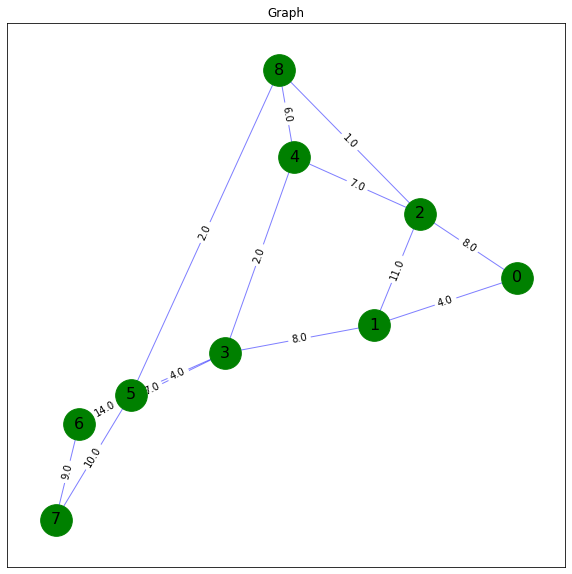

In [31]:
weights = [
    (0, 1, 4),
    (0, 7, 8),
    (1, 7, 11),
    (2, 1, 8),
    (2, 8, 2),
    (2, 5, 4),
    (2, 3, 7),
    (3, 4, 9),
    (3, 5, 14),
    (4, 5, 10),
    (5, 6, 2),
    (6, 8, 6),
    (6, 7, 1),
    (7, 8, 7),
]

G = nx.Graph()
G.add_weighted_edges_from(weights)
M = nx.to_numpy_array(G)
G = nx.Graph(M)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(9)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graph")
plt.show()

In [32]:
def bellmanFordAlgorithm(M, start):
    n = len(M)
    prev = [None for _ in range(n)]
    d = [np.inf for _ in range(n)]
    d[start] = 0

    for i in range(n):
        for j in range(n):
            if d[j] > d[i] + M[i][j] and M[i][j] > 0:
                d[j] = d[i] + M[i][j]
                prev[j] = i
    
    return d, prev


In [33]:
def getPath(prev, start, end):
    i = start
    j = end
    res = []
    while i != j:
        res.append((prev[j], j))
        j = prev[j]
    
    return res

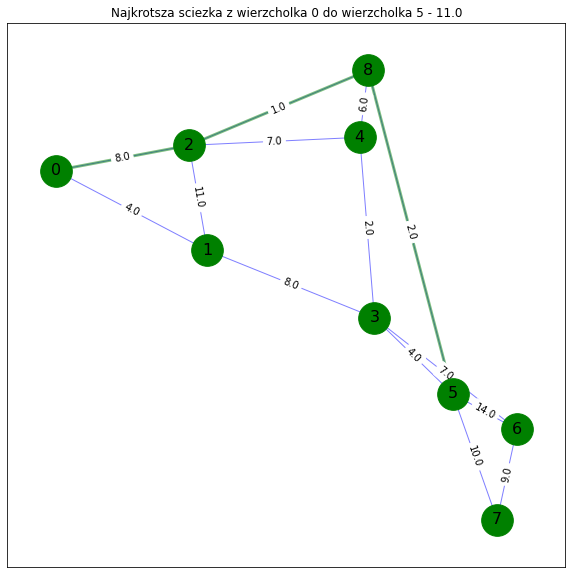

In [35]:
M = nx.to_numpy_array(G)

start = 0
end = 5

distances, prev = bellmanFordAlgorithm(M, start)

edgeList = getPath(prev, start, end)

G = nx.Graph(M)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)


nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(9)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=edgeList, width=3, alpha=0.5,edge_color='g')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title(f"Najkrotsza sciezka z wierzcholka {start} do wierzcholka {end} - {distances[end]}")
plt.show()

## Algorytm A*


In [ ]:
def calc_FScore():
    pass


def calcEucDist(start, end):
    pass


def AStarAlgorithm(M, start, end, h):
    n = len(M)
    closedSet = []
    openSet = [start]
    g_score = [np.inf for _ in range(n)]
    g_score[start] = 0
    current = start
    h_score = [0]

    while len(openSet) != 0:
        minimalFScore = np.inf
        x = None

        for node in openSet:
            if g_score[current] + M[current][node] + h[node] < minimalFScore:
                minimalFScore = g_score[current] + M[current][node] + h[node]
                x = node
            
        if x == end:
            return
        
        openSet.remove(x)
        closedSet.append(x)

        for i in range(n):
            if M[x][i] > 0 and i in closedSet:
                pass

            tentative_g_score = g_score[x] + calcEucDist(x, i)
            tentative_is_better = False
            if i not in openSet:
                openSet.append(i)
                # h_score[]



# Zadanie 2

Z punktu dzialania algorytmu waznymi wlasnosciami grafu moze byc ilosc krawedzi.

# Zadanie 3

Zlozonosc obliczeniowa Algorytmu Bellmana-Forda to $O(|V| \cdot |E|)$